<div >
<img src = "../banner.jpg" />
</div>

# Spatial Data

In [1]:
require("pacman")
p_load("tidyverse","sf","modeldata","geojsonio")

Loading required package: pacman



In [2]:
data("ames", package = "modeldata")

In [3]:
head(ames)

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,⋯,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,⋯,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,⋯,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,⋯,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078


In [4]:
dim(ames)

[1] 2930   74

In [5]:
class(ames)

[1] "tbl_df"     "tbl"        "data.frame"

![](figs/mercator.gif)

In [25]:
ames_sf <- sf::st_as_sf(
  ames,
  # "coords" is in x/y order -- so longitude goes first!
  coords = c("Longitude", "Latitude"),
  remove=FALSE,
  # Set our coordinate reference system to EPSG:4326,
  # the standard WGS84 geodetic coordinate reference system
  crs = 4326
)

In [22]:
#?st_as_sf

In [7]:
class(ames_sf)

[1] "sf"         "tbl_df"     "tbl"        "data.frame"

In [12]:
head(ames_sf)

MS_SubClass                         MS_Zoning                Lot_Frontage
1 One_Story_1946_and_Newer_All_Styles Residential_Low_Density  141         
2 One_Story_1946_and_Newer_All_Styles Residential_High_Density  80         
3 One_Story_1946_and_Newer_All_Styles Residential_Low_Density   81         
4 One_Story_1946_and_Newer_All_Styles Residential_Low_Density   93         
5 Two_Story_1946_and_Newer            Residential_Low_Density   74         
6 Two_Story_1946_and_Newer            Residential_Low_Density   78         
  Lot_Area Street Alley           Lot_Shape          Land_Contour Utilities
1 31770    Pave   No_Alley_Access Slightly_Irregular Lvl          AllPub   
2 11622    Pave   No_Alley_Access Regular            Lvl          AllPub   
3 14267    Pave   No_Alley_Access Slightly_Irregular Lvl          AllPub   
4 11160    Pave   No_Alley_Access Regular            Lvl          AllPub   
5 13830    Pave   No_Alley_Access Slightly_Irregular Lvl          AllPub   
6  9978    Pave   No_Alley_Access Slightly_Irregular Lvl          AllPub   
  Lot_Config ⋯ Misc_Feature Misc_Val Mo_Sold Year_Sold Sale_Type Sale_Condition
1 Corner     ⋯ None             0    5       2010      WD        Normal        
2 Inside     ⋯ None             0    6       2010      WD        Normal        
3 Corner     ⋯ Gar2         12500    6       2010      WD        Normal        
4 Corner     ⋯ None             0    4       2010      WD        Normal        
5 Inside     ⋯ None             0    3       2010      WD        Normal        
6 Inside     ⋯ None             0    6       2010      WD        Normal        
  Sale_Price Longitude Latitude geometry                  
1 215000     -93.61975 42.05403 POINT (-93.61975 42.05403)
2 105000     -93.61976 42.05301 POINT (-93.61976 42.05301)
3 172000     -93.61939 42.05266 POINT (-93.61939 42.05266)
4 244000     -93.61732 42.05125 POINT (-93.61732 42.05125)
5 189900     -93.63893 42.06090 POINT (-93.63893 42.0609) 
6 195500     -93.63893 42.06078 POINT (-93.63893 42.06078)

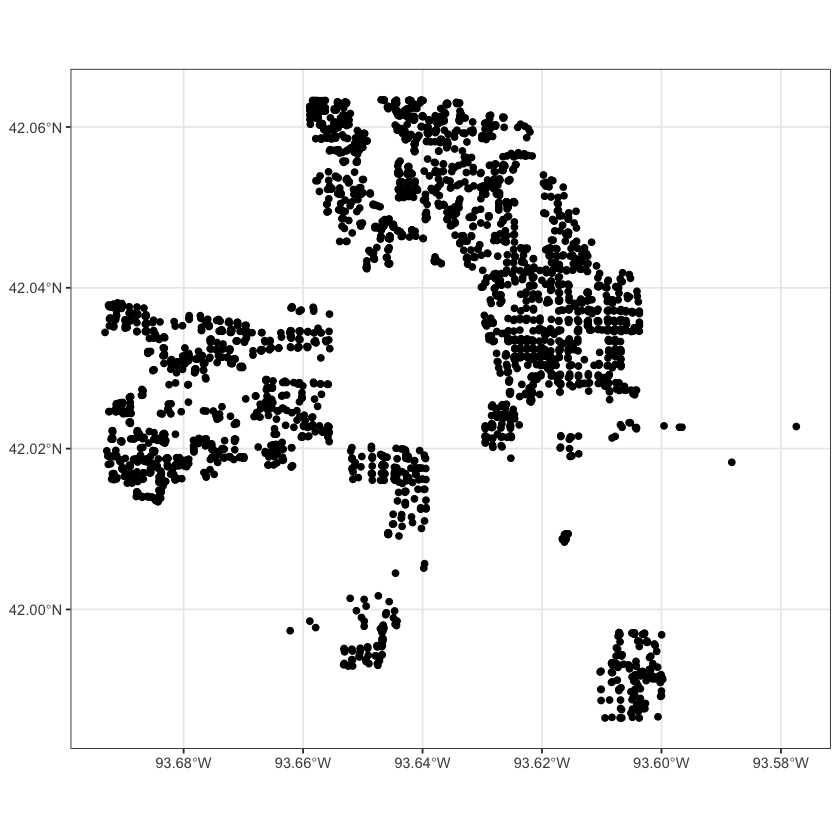

In [15]:
#graficar con ggplot
ggplot() +
    geom_sf(data=ames_sf)+
    theme_bw()

In [26]:
p_load("leaflet")

In [27]:
map1<-leaflet()  %>% 
        addTiles()  %>% 
        addCircleMarkers(data=ames_sf)
map1

HTML widgets cannot be represented in plain text (need html)

In [28]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
p_load("htmlwidgets","IRdisplay")

saveWidget(map1, 'demo1.html', selfcontained = FALSE)
display_html('<iframe src="demo1.html" width="800" height="800"></iframe>')

In [19]:
#Different Tiles
map2<-leaflet()  %>% 
    addProviderTiles(providers$Stamen.Toner)  %>% 
    addCircles(data=ames_sf)

In [20]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
p_load("htmlwidgets","IRdisplay")

saveWidget(map2, 'demo2.html', selfcontained = FALSE)
display_html('<iframe src="demo2.html" width="800" height="800"></iframe>')

# Clustering
## Etapas

Las etapas del análisis de clusters podemos resumirlas de la siguiente forma:

1. Iniciamos con una matriz de datos

    \begin{align}
X_{n\times k}=\left(\begin{array}{cccc}
x_{11} &  & \dots & x_{1k}\\
\\
\vdots &  & x_{ik} & \vdots\\
\\
x_{n1} &  & \dots & x_{nk} 
\end{array}\right)
    \end{align}

2. Calculamos la matriz de distancia o disimilitud

\begin{align}
D_{n\times n}=\left(\begin{array}{ccccc}
d_{11} &  & \dots &  & d_{1n}\\
 & \ddots\\
\vdots &  & d_{jj} &  & \vdots\\
 &  &  & \ddots\\
d_{n1} &  & \dots &  & d_{nn}
\end{array}\right)
\end{align}


3. Aplicamos el algoritmo de clustering. Existen varios tipos, en esta módulo nos centramos en aquellos  **Algoritmos basados en centroides**. En estos algoritmos cluster está representado por un centroide. Los clusters se construyen en función de la distancia al centroide del grupo.

In [29]:
set.seed(101011)
ames_sample<-ames_sf  %>% sample_frac(size=1/3)  #una fracción de los datos para rapidez en clase, usted use todos
db<- ames_sample  %>%  select(geometry) #me quedo sólo con la geometría
head(db)

geometry
<POINT [°]>
POINT (-93.61843 42.03981)
POINT (-93.60064 41.99282)
POINT (-93.65627 42.0633)
POINT (-93.64717 42.04741)
POINT (-93.68144 42.01627)
POINT (-93.68496 42.02199)


In [30]:
db<-st_distance(db) #matriz de distancias
head(db)

Units: [m]
         [,1]     [,2]     [,3]     [,4]      [,5]      [,6]     [,7]     [,8]
[1,]    0.000 5427.658 4073.055 2518.941 5825.6619 5841.5591 1510.612 1611.668
[2,] 5427.658    0.000 9085.296 7184.221 7167.6837 7685.3927 6906.400 7033.275
[3,] 4073.055 9085.296    0.000 1921.100 5627.5895 5168.5484 2717.986 2770.083
[4,] 2518.941 7184.221 1921.100    0.000 4471.9924 4210.6710 1707.292 1902.218
[5,] 5825.662 7167.684 5627.589 4471.992    0.0000  699.5592 5957.744 6186.400
[6,] 5841.559 7685.393 5168.548 4210.671  699.5592    0.0000 5794.237 6017.105
         [,9]    [,10]     [,11]     [,12]     [,13]     [,14]     [,15]
[1,] 2374.887 1291.040  923.7357  888.2099 6466.3955 3350.2410 5587.1752
[2,] 7622.742 6697.511 5831.2306 4860.4381 8067.0908 8596.5586  160.8872
[3,] 1746.879 3307.870 3347.6877 4944.6924 5711.1813  983.0459 9244.9819
[4,] 1186.347 2321.911 1636.3247 3400.6278 4831.6279 1746.3548 7343.1574
[5,] 5658.198 6431.639 5071.4725 6384.1873  899.4295 6028.0594 7281.667

In [31]:
db<-units::drop_units(db) #elimina las unidades de la matriz
head(db)

0.000,5427.658,4073.055,2518.941,5825.6619,5841.5591,1510.612,1611.668,2374.887,1291.040,⋯,6223.4573,1823.054,3151.170,3363.6742,6343.1482,4900.299,5105.670,681.1987,6448.4801,3524.0539
5427.658,0.000,9085.296,7184.221,7167.6837,7685.3927,6906.400,7033.275,7622.742,6697.511,⋯,7575.8856,7245.567,4123.768,8419.3505,8368.7216,7542.888,7756.419,6080.1446,7766.4212,8409.4804
4073.055,9085.296,0.000,1921.100,5627.5895,5168.5484,2717.986,2770.083,1746.879,3307.870,⋯,5809.7931,2640.976,5424.455,709.3958,5238.4640,3999.010,4048.131,3693.6288,5958.8643,705.1202
2518.941,7184.221,1921.100,0.000,4471.9924,4210.6710,1707.292,1902.218,1186.347,2321.911,⋯,4766.5481,1931.008,3533.523,1326.4450,4518.3332,3055.840,3202.418,2402.1231,4960.9848,1228.3648
5825.662,7167.684,5627.589,4471.992,0.0000,699.5592,5957.744,6186.400,5658.198,6431.639,⋯,438.8065,6282.979,3470.432,5443.6865,1298.4311,1646.829,1659.357,6181.3113,663.7615,5075.3338
5841.559,7685.393,5168.548,4210.671,699.5592,0.0000,5794.237,6017.105,5388.928,6313.337,⋯,659.4619,6092.321,3816.929,5057.2558,683.3335,1188.389,1121.125,6127.0950,790.3567,4666.3081


In [32]:
k3 <- kmeans(db, centers = 3, nstart = 25)
str(k3)

List of 9
 $ cluster     : int [1:977] 3 1 3 3 2 2 3 3 3 3 ...
 $ centers     : num [1:3, 1:977] 5238 5005 1902 1646 7029 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : NULL
 $ totss       : num 3.22e+12
 $ withinss    : num [1:3] 8.27e+10 2.93e+11 7.39e+11
 $ tot.withinss: num 1.11e+12
 $ betweenss   : num 2.1e+12
 $ size        : int [1:3] 78 307 592
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [33]:
ames_sample<- ames_sample %>% mutate(clusters=factor(k3$cluster))

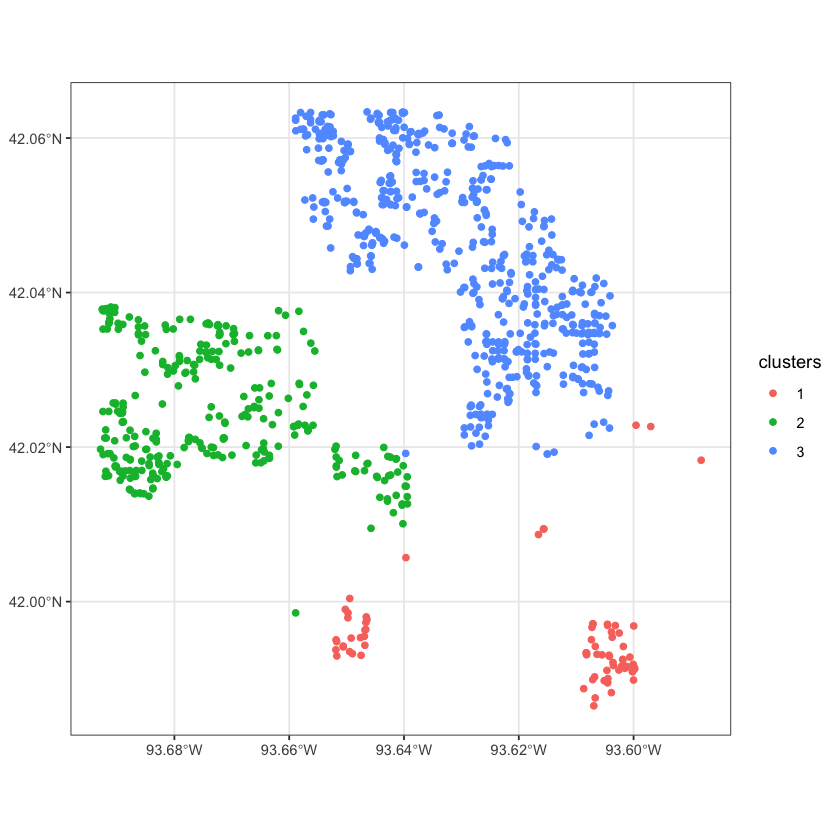

In [34]:
ggplot() +
  geom_sf(data=ames_sample,aes(col=clusters)) + #graficamos las predicciones
  theme_bw()


## Caveat

Los métodos de clustering son exploratorios: se pueden utilizar para evaluar la calidad de los datos y generar hipótesis. 

Pero no importa lo que entre en el algoritmo de agrupamiento, los clusters salen. Esta es una situación clásica de "basura que entra, basura que sale". 



![](figs/Garbage-Model.jpg)



Obviamente, esperamos que lo que se está metiendo en el análisis no sea basura, pero eso no garantiza que salga una "pearl of wisdom".

La conclusión es que la agrupación es buena si es útil para responder el problema en particular. Pero, esto es difícil de evaluar.


Hay medidas de cuán bueno es el agrupamiento. Funcionan según el principio de que las distancias entre los elementos del mismo grupo deben ser pequeñas y las distancias entre los elementos de diferentes grupos deben ser grandes. 

Esta es una verificación interna de la "estrechez" de los grupos, pero no garantiza que los grupos sean útiles y/o significativos para el problema bajo estudio. Esto requiere que el usuario utilice su capacidad y discernimiento.

## ¿Cuántos K (clusters) debemos elegir?

### Método del codo

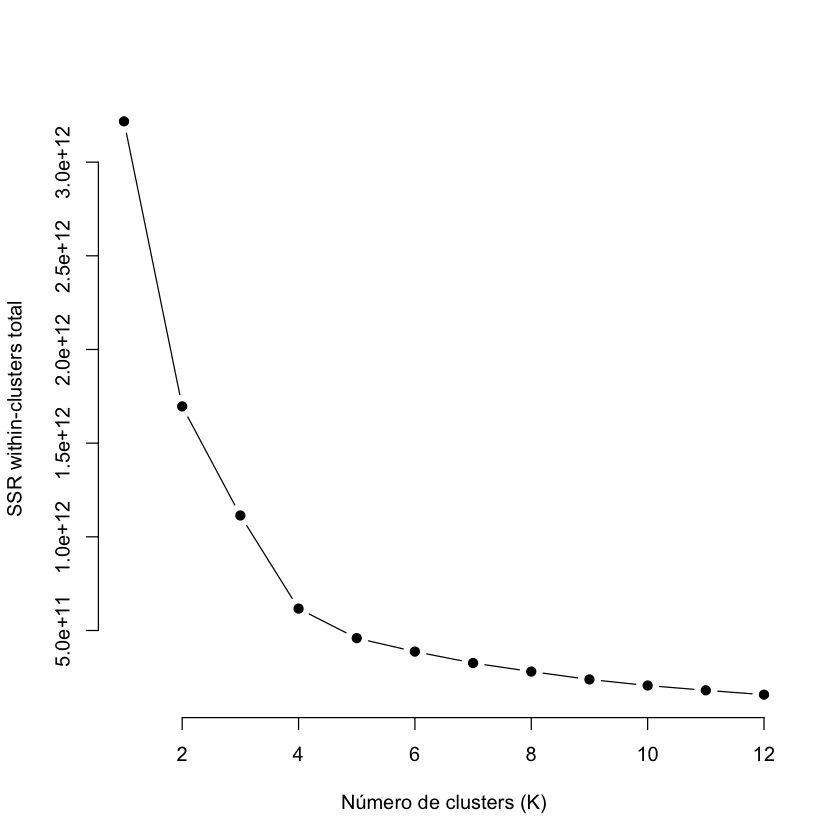

In [35]:
# función que calcula la SSR within-cluster 
wss <- function(k) {
  kmeans(db, k, nstart = 25 )$tot.withinss
}

# Calculamos y graficamos para k = 1 hasta k = 12
wss_values <- sapply(1:12,wss)

plot(1:12, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Número de clusters (K)",
       ylab="SSR within-clusters total")

### Coeficiente de Silhouette

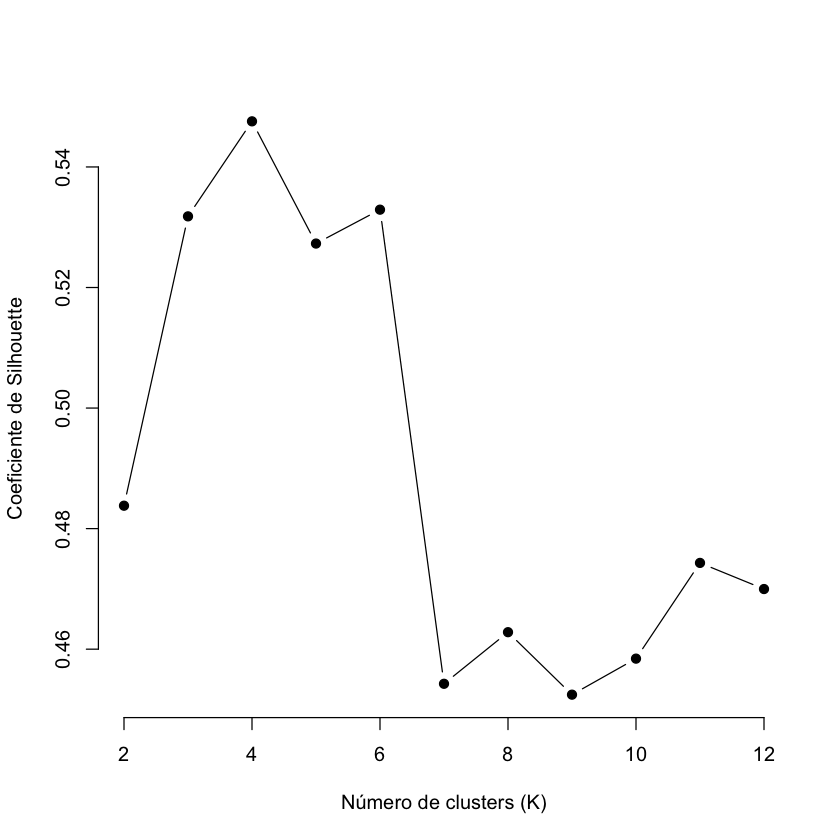

In [36]:
p_load("cluster")
# función para extraer el coeficiente de silhouette

avg_sil <- function(k) {
  km.res <- kmeans(db, centers = k, nstart = 25)
  ss <- cluster::silhouette(km.res$cluster, dist(db))
  mean(ss[, 3])
}


# Calcular el coeficiente de silhouette para  k = 2 hasta k = 12
valores_sil <-  sapply(2:12,avg_sil)

plot(2:12, valores_sil,
       type = "b", pch = 19, frame = FALSE, 
       xlab="Número de clusters (K)",
       ylab = "Coeficiente de Silhouette")

In [37]:
k4 <- kmeans(db, centers = 4, nstart = 25)

ames_sample<- ames_sample %>% mutate(clusters=factor(k4$cluster))

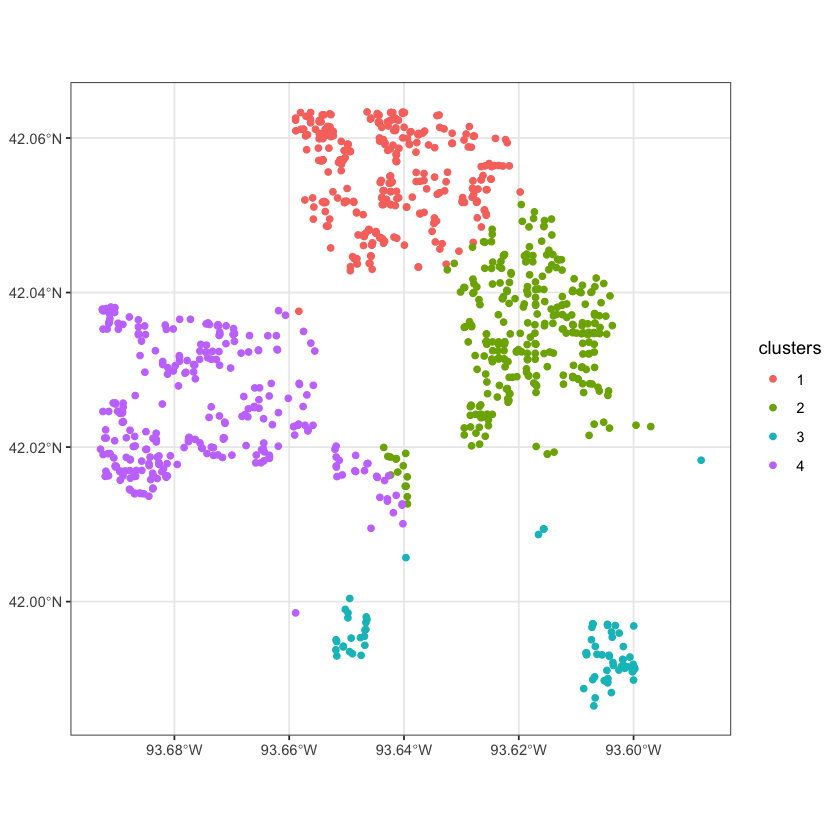

In [38]:
ggplot() +
  geom_sf(data=ames_sample,aes(col=clusters)) + #graficamos las predicciones
  theme_bw()

# Super learner

Vamos a modelar los precios de venta de las casas en el conjunto de datos de Ames. Digamos que el precio de venta de estas casas depende del año en que se construyeron, su superficie habitable (tamaño) y el tipo de casa que son (dúplex vs. townhouse vs. unifamiliar)

In [39]:
ames<- ames  %>% mutate(logprice=log(Sale_Price))

In [40]:
p_load("caret")
set.seed(1011)
inTrain <- createDataPartition(
  y = ames$logprice,## La variable dependiente u objetivo 
  p = .7, ## Usamos 70%  de los datos en el conjunto de entrenamiento 
  list = FALSE)


train <- ames[ inTrain,]
test  <- ames[-inTrain,]
colnames(train)

[1] "MS_SubClass"        "MS_Zoning"          "Lot_Frontage"      
 [4] "Lot_Area"           "Street"             "Alley"             
 [7] "Lot_Shape"          "Land_Contour"       "Utilities"         
[10] "Lot_Config"         "Land_Slope"         "Neighborhood"      
[13] "Condition_1"        "Condition_2"        "Bldg_Type"         
[16] "House_Style"        "Overall_Cond"       "Year_Built"        
[19] "Year_Remod_Add"     "Roof_Style"         "Roof_Matl"         
[22] "Exterior_1st"       "Exterior_2nd"       "Mas_Vnr_Type"      
[25] "Mas_Vnr_Area"       "Exter_Cond"         "Foundation"        
[28] "Bsmt_Cond"          "Bsmt_Exposure"      "BsmtFin_Type_1"    
[31] "BsmtFin_SF_1"       "BsmtFin_Type_2"     "BsmtFin_SF_2"      
[34] "Bsmt_Unf_SF"        "Total_Bsmt_SF"      "Heating"           
[37] "Heating_QC"         "Central_Air"        "Electrical"        
[40] "First_Flr_SF"       "Second_Flr_SF"      "Gr_Liv_Area"       
[43] "Bsmt_Full_Bath"     "Bsmt_Half_Bath"     "Full_Bath"         
[46] "Half_Bath"          "Bedroom_AbvGr"      "Kitchen_AbvGr"     
[49] "TotRms_AbvGrd"      "Functional"         "Fireplaces"        
[52] "Garage_Type"        "Garage_Finish"      "Garage_Cars"       
[55] "Garage_Area"        "Garage_Cond"        "Paved_Drive"       
[58] "Wood_Deck_SF"       "Open_Porch_SF"      "Enclosed_Porch"    
[61] "Three_season_porch" "Screen_Porch"       "Pool_Area"         
[64] "Pool_QC"            "Fence"              "Misc_Feature"      
[67] "Misc_Val"           "Mo_Sold"            "Year_Sold"         
[70] "Sale_Type"          "Sale_Condition"     "Sale_Price"        
[73] "Longitude"          "Latitude"           "logprice"

In [41]:
p_load("SuperLearner")

In [42]:
# Review available models.
listWrappers()

All prediction algorithm wrappers in SuperLearner:




 [1] "SL.bartMachine"      "SL.bayesglm"         "SL.biglasso"        
 [4] "SL.caret"            "SL.caret.rpart"      "SL.cforest"         
 [7] "SL.earth"            "SL.extraTrees"       "SL.gam"             
[10] "SL.gbm"              "SL.glm"              "SL.glm.interaction" 
[13] "SL.glmnet"           "SL.ipredbagg"        "SL.kernelKnn"       
[16] "SL.knn"              "SL.ksvm"             "SL.lda"             
[19] "SL.leekasso"         "SL.lm"               "SL.loess"           
[22] "SL.logreg"           "SL.mean"             "SL.nnet"            
[25] "SL.nnls"             "SL.polymars"         "SL.qda"             
[28] "SL.randomForest"     "SL.ranger"           "SL.ridge"           
[31] "SL.rpart"            "SL.rpartPrune"       "SL.speedglm"        
[34] "SL.speedlm"          "SL.step"             "SL.step.forward"    
[37] "SL.step.interaction" "SL.stepAIC"          "SL.svm"             
[40] "SL.template"         "SL.xgboost"         



All screening algorithm wrappers in SuperLearner:




[1] "All"
[1] "screen.corP"           "screen.corRank"        "screen.glmnet"        
[4] "screen.randomForest"   "screen.SIS"            "screen.template"      
[7] "screen.ttest"          "write.screen.template"


In [43]:
ySL<-train$logprice
XSL<- train  %>% select(Year_Built, Bldg_Type, Gr_Liv_Area)

In [44]:
sl.lib <- c("SL.randomForest", "SL.lm") #lista de los algoritmos a correr

# Fit using the SuperLearner package,

fitY <- SuperLearner(Y = ySL,  X= data.frame(XSL),
                     method = "method.NNLS", # combinación convexa
                     SL.library = sl.lib)

fitY

Loading required namespace: randomForest




Call:  
SuperLearner(Y = ySL, X = data.frame(XSL), SL.library = sl.lib, method = "method.NNLS") 



                          Risk      Coef
SL.randomForest_All 0.04174329 0.5346039
SL.lm_All           0.04248011 0.4653961

In [45]:
test <- test  %>%  mutate(yhat_Sup=predict(fitY, newdata = data.frame(test), onlySL = T)$pred)
head(test$yhat_Sup)

11.72938
12.24929
12.23490
12.08342
12.47830
11.80857


In [46]:
with(test,mean(abs(logprice-yhat_Sup))) #MAE

[1] 0.1461409

## Test algorithm with multiple hyperparameter settings

The performance of an algorithm varies based on its hyperparamters, which again are its configuration settings. Some algorithms may not vary much, and others might have far better or worse performance for certain settings. Often we focus our attention on 1 or 2 hyperparameters for a given algorithm because they are the most important ones.

For random forest there are two particularly important hyperparameters: mtry and maximum leaf nodes. Mtry is how many features are randomly chosen within each decision tree node - in other words, each time the tree considers making a split. Maximum leaf nodes controls how complex each tree can get.

Let's try 3 different mtry options.

In [47]:
# Customize the defaults for random forest.
custon_ranger = create.Learner("SL.ranger", params = list(num.trees = 1000))

# Look at the object.
custon_ranger$names


[1] "SL.ranger_1"

In [49]:
custom_rf = create.Learner("SL.randomForest",
                     tune = list(mtry = round(c(1, sqrt(4), 3))))
custom_rf$names

[1] "SL.randomForest_1" "SL.randomForest_2" "SL.randomForest_3"

In [50]:
# Customize the defaults for random forest.
custon_glmnet = create.Learner("SL.glmnet", tune = list(alpha = seq(0, 1, length.out=5)))

# Look at the object.
custon_glmnet$names

[1] "SL.glmnet_1" "SL.glmnet_2" "SL.glmnet_3" "SL.glmnet_4" "SL.glmnet_5"

In [51]:
sl.lib2 <- c("SL.randomForest", "SL.lm",custon_ranger$names,custon_glmnet$names,custom_rf$names)
sl.lib2

[1] "SL.randomForest"   "SL.lm"             "SL.ranger_1"      
 [4] "SL.glmnet_1"       "SL.glmnet_2"       "SL.glmnet_3"      
 [7] "SL.glmnet_4"       "SL.glmnet_5"       "SL.randomForest_1"
[10] "SL.randomForest_2" "SL.randomForest_3"

In [54]:
# Fit (takes forever)

fitY_long <- SuperLearner(Y = ySL, X = data.frame(XSL),
     method = "method.NNLS", SL.library = sl.lib2)

fitY_long

Loading required namespace: ranger

Loading required namespace: glmnet




Call:  
SuperLearner(Y = ySL, X = data.frame(XSL), SL.library = sl.lib2, method = "method.NNLS") 



                            Risk      Coef
SL.randomForest_All   0.04145115 0.0000000
SL.lm_All             0.04234935 0.3272033
SL.ranger_1_All       0.04476339 0.0000000
SL.glmnet_1_All       0.04269028 0.0000000
SL.glmnet_2_All       0.04235182 0.0000000
SL.glmnet_3_All       0.04235494 0.0000000
SL.glmnet_4_All       0.04235427 0.0000000
SL.glmnet_5_All       0.04235489 0.0000000
SL.randomForest_1_All 0.04141088 0.1763900
SL.randomForest_2_All 0.03968806 0.4964068
SL.randomForest_3_All 0.04142460 0.0000000

# Spatial Cross Validation


In [ ]:
p_load("spatialsample")

ames_sf <- sf::st_as_sf(
  ames,
  # "coords" is in x/y order -- so longitude goes first!
  coords = c("Longitude", "Latitude"),
  # Set our coordinate reference system to EPSG:4326,
  # the standard WGS84 geodetic coordinate reference system
  crs = 4326
)


In [ ]:
set.seed(123)
block_folds <- spatial_block_cv(ames_sf, v = 15)



In [ ]:
autoplot(block_folds) + theme_bw()

In [ ]:

set.seed(123)
cluster_folds <- spatial_clustering_cv(ames_sf, v = 15)
autoplot(cluster_folds) + theme_bw()

In [ ]:
set.seed(123)
location_folds <- 
  spatial_leave_location_out_cv(
   ames_sf,
    group = Neighborhood,
    v = 15
  )

In [ ]:
autoplot(location_folds)+ theme_bw()

In [ ]:
table(ames_sf$Neighborhood)


In [ ]:
ames_sf <- ames_sf   %>% mutate(Neighborhood=droplevels(Neighborhood))

In [ ]:
table(ames_sf$Neighborhood)

In [ ]:
length(unique(ames_sf$Neighborhood))

In [ ]:
test_neigh<- ames_sf  %>% filter(Neighborhood=="North_Ames")
test_neigh <- test_neigh   %>% mutate(Neighborhood=droplevels(Neighborhood))
train_neigh<- ames_sf  %>% filter(Neighborhood!="North_Ames")
train_neigh <- train_neigh   %>% mutate(Neighborhood=droplevels(Neighborhood))

In [ ]:
y_neigh<-train_neigh$logprice
X_neigh<- train_neigh  %>% select(Year_Built, Bldg_Type, Gr_Liv_Area)  %>% st_drop_geometry()

In [ ]:
index <- split(1:nrow(train_neigh),train_neigh$Neighborhood)

In [ ]:
index

In [ ]:
folds<-length(index)
folds

In [ ]:
fitY_neigh <- SuperLearner(Y = y_neigh, X = data.frame(X_neigh),
    method = "method.NNLS", SL.library = sl.lib,
    cvControl = list(V = folds, validRows = index))

In [ ]:
fitY_neigh

In [ ]:
yhat_SL_neigh=predict(fitY_neigh, newdata = data.frame(test_neigh), onlySL = T)$pred


In [ ]:
with(test_neigh,mean(abs(logprice-yhat_SL_neigh)))

In [ ]:
with(test ,mean(abs(logprice-yhat_Sup)))